# Graphing Innate Slowing Behaviour

## Step 1: Importing Libraries

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
# import plotly.graph_objects as go
# import plotly.express as px
import os
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
print("done step 1")

done step 1


## Step 2: Designating Folder Path

Must Designate Folder Path (Easiest if on Desktop) in first row

In [2]:
folder_path='/Users/Joseph/Desktop/Innate_Test_June2_2022' #   <---------------MUST INPUT HERE--------------------------
os.chdir(folder_path)
print("done step 2")


done step 2


## Step 3: Importing File List

In [3]:
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here
filelist = list() #<- empty list
num_files = 0
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.dat'): #<- and takes out all files with a .trv (file that contains your data)
            num_files = num_files+1
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print("Successfully compiled " + str(num_files) + " files.")
print(filelist)
print("done step 3")


Successfully compiled 278 files.
['/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_114112/e1112_10x4_t96h20C_600s_C0602_bb.00181.dat', '/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_114112/e1112_10x4_t96h20C_600s_C0602_bb.00180.dat', '/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_114112/e1112_10x4_t96h20C_600s_C0602_bb.00223.dat', '/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_114112/e1112_10x4_t96h20C_600s_C0602_bb.00237.dat', '/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_114112/e1112_10x4_t96h20C_600s_C0602_bb.00009.dat', '/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_114112/e1112_10x4_t96h20C_600s_C0602_bb.00034.dat', '/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_114112/e1112_10x4_t96h20C_600s_C0602_bb.00222.dat', '/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_114112/e1112_10x4_t96h20C_600s_C0602_bb.00183.dat', '/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_1

## Step 4: Inputing Strain Name Dictionary

Input Strain Names Based on Format Below

In [4]:
#Format: Strain_# = 'unique_identifier'

### Make into dictionary
StrainNames = {
    'Strain_1' : 'N2',   #<- each strain will be designated to a unique identifier here
    'Strain_2' : 'e1112',
#     'Strain_3' : '',
#     'Strain_4' : '',
#     'Strain_5' : '',
#     'Strain_6' : '',
#     'Strain_7' : '',
#     'Strain_8' : '',
#     'Strain_9' : '',  #<- empty entries are for those hardcore trackers that tracking this many strains
#     'Strain_10' : '',
#     'Strain_11' : '',
#     'Strain_12' : '',
#     'Strain_13' : '',
#     'Strain_14' : '',
#     'Strain_15' : '',
}
#...etc, etc


print('done step 4')

done step 4


## Step 5: Setting Up Defined Functions

In [13]:
def round_to_bin(number):
    return round(number * 2) / 2

# def ProcessData(strain): #<- an example of a user-defined function
#     strain_filelist = []  #<- empty list
#     for i in filelist: #<- goes through the list and filters for keyword
#         if strain in i:
#             strain_filelist.append(i)
#     Strain_N = len(strain_filelist) #<- N per strain, or number of plates
#     print(f'This Strain has {Strain_N} worms') #<- prints out number of plates per strain
#     wormID=1
#     for i, f in enumerate(strain_filelist, start=1): #<- a progress bar function integrated into data import
#         N = len(strain_filelist)
#         statement = f"Processing {i} of {N} worms" #<- progress bar statement
#         df = pd.read_csv(f, header = None) #<- imports and cleans data
# #         df=df.rename(columns={0:"raw_time",
# #                               1:'speed',
# #                               2:'x',
# #                               3:'y',
# #                               4:'pathlength',
# #                               5:'time_synced'})
#         df["time_synched_bin"]=round_to_bin(df["time_synced"])
#         df["Worm ID"]=wormID
#         wormID+=1
#         if i==1:
#             DF_Total = df
#         else:
#             DF_Total = pd.concat((DF_Total, df))  #<- imports and cleans data
#         print(statement)
    
#     return{
#             'N': Strain_N,
#             'Confirm':DF_Total,
#             'Filelist':strain_filelist} 

def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = []  #<- empty list
    for i in filelist: #<- goes through the list and filters for keyword
        if strain in i:
            strain_filelist.append(i)
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    print(f'This Strain has {Strain_N} worms tracked') #<- prints out number of plates per strain
    for i, f in enumerate(strain_filelist, start=1): #<- a progress bar function integrated into data import
        N = len(strain_filelist)
        statement = f"Processing {i} of {N} worms" #<- progress bar statement
#         DF_Read = pd.read_csv(f, header = None) #<- imports and cleans data
        DF_Read = pd.read_csv(f, sep=' ', skiprows = 0, header = None)
        if i==1:
            DF_Total = DF_Read
            DF_Total["worm"]=i
            DF_Total["x_0"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
            DF_Total["y_0"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
        else:
            DF_Add = DF_Read
            DF_Add["worm"]=i
            DF_Add["x_0"] = DF_Add.iloc[:,2] - DF_Add.iloc[0,2]
            DF_Add["y_0"] = DF_Add.iloc[:,3] - DF_Add.iloc[0,3]
            DF_Total = pd.concat((DF_Total, DF_Add), ignore_index = False)  #<- imports and cleans data
        print(statement)
#     DF_Total = DF_Total.dropna(axis = 0) #<- more data cleaning
    DF_Total = DF_Total.rename( #<- more data cleaning
                {0:'time',
                1:'speed',
                2: "x",
                3: "y",
                4: "angularspeed",
                5: "pathlength",
                6: "kink",
                7: "bias",
                8: "curve",
                9: "dir",
                10: "crab",
                11: "length",
                12: "midline",
                13: "width",
                14: "morphwidth",
                15: "area",
#                 16: "time_synced"
                }, axis=1)
#     DF_Total['time_synced_bin'] = round_to_bin(DF_Total["time_synced"])
    DF_Speed_DF = DF_Total[["time", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
#     DF_Speed_DF = DF_Total[["time", "time_synced_bin", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
    
    return{
            'N': Strain_N,
            'Confirm':DF_Total,
            'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
            'Filelist':strain_filelist} 

# def ProcessEntryData(strain): #<- an example of a user-defined function
#     strain_filelist = []  #<- empty list
#     for i in filelist: #<- goes through the list and filters for keyword
#         if strain in i:
#             strain_filelist.append(i)
#     Strain_N = len(strain_filelist) #<- N per strain, or number of plates
#     print(f'This Strain has {Strain_N} worms tracked') #<- prints out number of plates per strain
#     for i, f in enumerate(strain_filelist, start=1): #<- a progress bar function integrated into data import
#         N = len(strain_filelist)
#         statement = f"Processing {i} of {N} worms" #<- progress bar statement
#         DF_Read = pd.read_csv(f, header = None) #<- imports and cleans data
#         if i==1:
#             DF_Total = DF_Read[DF_Read.iloc[:,5]>=0]
# #             DF_Total = DF_Total.dropna(axis=0)
#             DF_Total["worm"]=i
#             DF_Total["x_0"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
#             DF_Total["y_0"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
#         else:
#             DF_Add = DF_Read[DF_Read.iloc[:,5]>=0]
# #             DF_Add = DF_Add.dropna(axis=0)
#             DF_Add["worm"]=i
#             DF_Add["x_0"] = DF_Add.iloc[:,2] - DF_Add.iloc[0,2]
#             DF_Add["y_0"] = DF_Add.iloc[:,3] - DF_Add.iloc[0,3]
#             DF_Total = pd.concat((DF_Total, DF_Add), ignore_index = False)  #<- imports and cleans data
#         print(statement)
# #     DF_Total = DF_Total.dropna(axis = 0) #<- more data cleaning
#     DF_Total = DF_Total.rename( #<- more data cleaning
#                 {0:'time',
#                 1:'speed',
#                 2: "x",
#                 3: "y",
#                 4: "angularspeed",
#                 5: "pathlength",
#                 6: "kink",
#                 7: "bias",
#                 8: "curve",
#                 9: "dir",
#                 10: "crab",
#                 11: "time_synced"
#                 }, axis=1)
#     DF_Total['time_synced_bin'] = round_to_bin(DF_Total["time_synced"])
#     DF_Speed_DF = DF_Total[["time", "time_synced_bin", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
    
#     return{
#             'N': Strain_N,
#             'Confirm':DF_Total,
#             'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
#             'Filelist':strain_filelist} 

# DFTotal=pd.DataFrame()
# wormID=1
# for f in filelist:
#     df = pd.read_csv(f, header=None)
#     df=df.rename(columns={0:"raw_time",1:'Speed',2:'time_scaled'})
#     df["Time"]=round_to_bin(df["time_scaled"])
#     df["Worm ID"]=wormID
#     DFTotal=pd.concat([DFTotal, df])
#     wormID+=1
# print(DFTotal)
print("done step 5")

done step 5


In [11]:
df = pd.read_csv('/Users/Joseph/Desktop/Innate_Test_June2_2022/cat-2/20220602_114112/e1112_10x4_t96h20C_600s_C0602_bb.00183.dat', sep=' ', skiprows = 0, header = None)
print(df)
# print(df[df.iloc[:,5]>0])

           0       1        2        3     4       5     6    7     8    9   \
0     478.298     NaN  17.9420  31.0865   NaN   0.000  31.3  1.0  29.7  0.0   
1     478.379  0.1607  17.9268  31.0854  20.7   0.015  31.5  1.0  26.2  0.0   
2     478.458  0.1343  17.9164  31.0834  17.2   0.026  31.4  1.0  29.4  0.0   
3     478.536  0.1423  17.9059  31.0825  15.5   0.036  31.5  1.0  25.9  0.0   
4     478.618  0.1541  17.8937  31.0814  14.9   0.048  22.2  1.0  29.9  0.0   
...       ...     ...      ...      ...   ...     ...   ...  ...   ...  ...   
1507  599.742  0.2979  15.1413  18.7108  13.6  23.958  66.1  0.0  34.9  0.0   
1508  599.823  0.3137  15.1575  18.6915  18.8  23.958  48.6  0.0  29.3  0.0   
1509  599.902  0.2577  15.1714  18.6706  16.9  23.958  57.3  0.0  30.0  0.0   
1510  600.017     NaN  15.1842  18.6517   NaN  23.958  54.9  0.0  23.7  0.0   
1511  600.102     NaN  15.1946  18.6383   NaN  23.958  63.4  0.0  27.3  0.0   

          10      11      12      13      14       

## Step 6: Cleaning and Compiling Data

In [15]:
Data = pd.DataFrame() #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in StrainNames.values(): #<- goes through the dictionary in step 6.1 and processes data
    if s == next(iter(StrainNames.values())):
        preData = ProcessData(s)['Confirm']
        preData["Strain"]= s
        Data = preData #<- appends all data into a list of dataframes
    else:
        preData = ProcessData(s)['Confirm']
        preData["Strain"]= s
        Data = pd.concat((Data, preData))
        
print(Data)
Data.to_csv("TotalData.csv")


# EntryData = pd.DataFrame() #<- generates empty list. 0 is there to account for python's index starting at 0. 
# # we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

# for s in StrainNames.values(): #<- goes through the dictionary in step 6.1 and processes data
#     if s == next(iter(StrainNames.values())):
#         preData = ProcessEntryData(s)['Confirm']
#         preData["Strain"]= s
#         Data = preData #<- appends all data into a list of dataframes
#     else:
#         preData = ProcessEntryData(s)['Confirm']
#         preData["Strain"]= s
#         Data = pd.concat((Data, preData))
        
# print(EntryData)
# EntryData.to_csv("TotalEntryData.csv")
print('done step 6')

This Strain has 115 worms tracked
Processing 1 of 115 worms
Processing 2 of 115 worms
Processing 3 of 115 worms
Processing 4 of 115 worms
Processing 5 of 115 worms
Processing 6 of 115 worms
Processing 7 of 115 worms
Processing 8 of 115 worms
Processing 9 of 115 worms
Processing 10 of 115 worms
Processing 11 of 115 worms
Processing 12 of 115 worms
Processing 13 of 115 worms
Processing 14 of 115 worms
Processing 15 of 115 worms
Processing 16 of 115 worms
Processing 17 of 115 worms
Processing 18 of 115 worms
Processing 19 of 115 worms
Processing 20 of 115 worms
Processing 21 of 115 worms
Processing 22 of 115 worms
Processing 23 of 115 worms
Processing 24 of 115 worms
Processing 25 of 115 worms
Processing 26 of 115 worms
Processing 27 of 115 worms
Processing 28 of 115 worms
Processing 29 of 115 worms
Processing 30 of 115 worms
Processing 31 of 115 worms
Processing 32 of 115 worms
Processing 33 of 115 worms
Processing 34 of 115 worms
Processing 35 of 115 worms
Processing 36 of 115 worms
Pro

done step 6


In [17]:
Data_clean=Data.dropna()
Data_clean[Data_clean.index.duplicated()]
FinalData = Data_clean.reset_index()
# FinalData[Data_clean.index.duplicated()]
print(Data_clean)
print(FinalData)

         time   speed        x        y  angularspeed  pathlength  kink  bias  \
2     502.912  0.1342  26.5456  36.8930           3.3       0.016  52.9   1.0   
3     502.957  0.1336  26.5454  36.8896           1.7       0.020  52.9   1.0   
4     503.000  0.1450  26.5446  36.8811           1.6       0.028  49.0   1.0   
5     503.042  0.1399  26.5444  36.8772           1.9       0.032  47.0   1.0   
6     503.083  0.1292  26.5431  36.8695           2.0       0.040  49.0   1.0   
...       ...     ...      ...      ...           ...         ...   ...   ...   
2503  351.081  0.0975  13.8750  28.3390           1.4      40.227  12.5   1.0   
2504  351.161  0.1183  13.8781  28.3469           1.4      40.235  13.6   1.0   
2505  351.226  0.1125  13.8820  28.3545           0.5      40.244  12.2   1.0   
2506  351.322  0.1062  13.8857  28.3626           1.7      40.244   8.2   0.0   
2507  351.401  0.0909  13.8891  28.3714           1.4      40.244  10.8   0.0   

      curve  dir    crab  l

In [20]:
N2_Data = FinalData[FinalData["Strain"]=="N2"]
cat2_Data = FinalData[FinalData["Strain"]=="e1112"]
# print(N2_Data)

In [4]:
Data = pd.read_csv('/Users/Joseph/Desktop/WT_e1112_tm2261_n4547_cat2_Day3_innate_04_02_2022/TotalData.csv', header = None)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# Data.head()
Data_header=Data.iloc[0]
NewData=Data[1:]
NewData.columns=Data_header
NewData.head()

,NaN,time,time_synced,speed,x,y,angularspeed,pathlength,kink,bias,...,length,midline,width,morphwidth,area,worm,x_0,y_0,time_synced_bin,Strain
1,0.0,331.94,-42.934,NaN,7.3452,42.4554,NaN,0.0,94.6,1,...,0.8613,1.0486,0.1674,0.0994,0.119556,1,NaN,0.0,-43.0,cat2_e1112
2,1.0,332.026,-42.848,0.3405,7.3726,42.46,14.9,0.027999999999999997,110.6,1,...,0.8505,1.0542,0.21600000000000003,0.0985,0.11518199999999999,1,NaN,0.02740000000000009,-43.0,cat2_e1112
3,2.0,332.105,-42.769,0.3527,7.4004,42.4654,19.3,0.055999999999999994,87.8,1,...,0.8748,1.0368,0.1539,0.1129,0.118827,1,NaN,0.05520000000000014,-43.0,cat2_e1112
4,3.0,332.18,-42.693999999999996,0.3345,7.4257,42.4718,23.4,0.08199999999999999,90.0,1,...,0.8289,1.0982,0.1944,0.1021,0.114453,1,NaN,0.0804999999999998,-42.5,cat2_e1112
5,4.0,332.26199999999994,-42.611999999999995,0.282,7.4507,42.4803,26.3,0.109,65.0,1,...,0.8991,1.0466,0.3159,0.0934,0.11591099999999999,1,NaN,0.10550000000000015,-42.5,cat2_e1112


In [21]:
print(NewData.dtypes)
NewData.time = NewData.time.astype(float)
NewData.worm = NewData.worm.astype(str)
NewData.speed = NewData.speed.astype(float)
NewData.time_synced=NewData.time_synced.astype(float)
print(NewData.dtypes)

0
NaN                float64
time               float64
time_synced         object
speed              float64
x                   object
y                   object
angularspeed        object
pathlength          object
kink                object
bias                object
curve               object
dir                 object
crab                object
length              object
midline             object
width               object
morphwidth          object
area                object
worm                object
x_0                 object
y_0                 object
time_synced_bin     object
Strain              object
dtype: object
0
NaN                float64
time               float64
time_synced        float64
speed              float64
x                   object
y                   object
angularspeed        object
pathlength          object
kink                object
bias                object
curve               object
dir                 object
crab                object
length    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Graphing single-worm plots

Must designate which strain (refer to Dictionary in Step 4) in the first row

<Figure size 432x288 with 0 Axes>

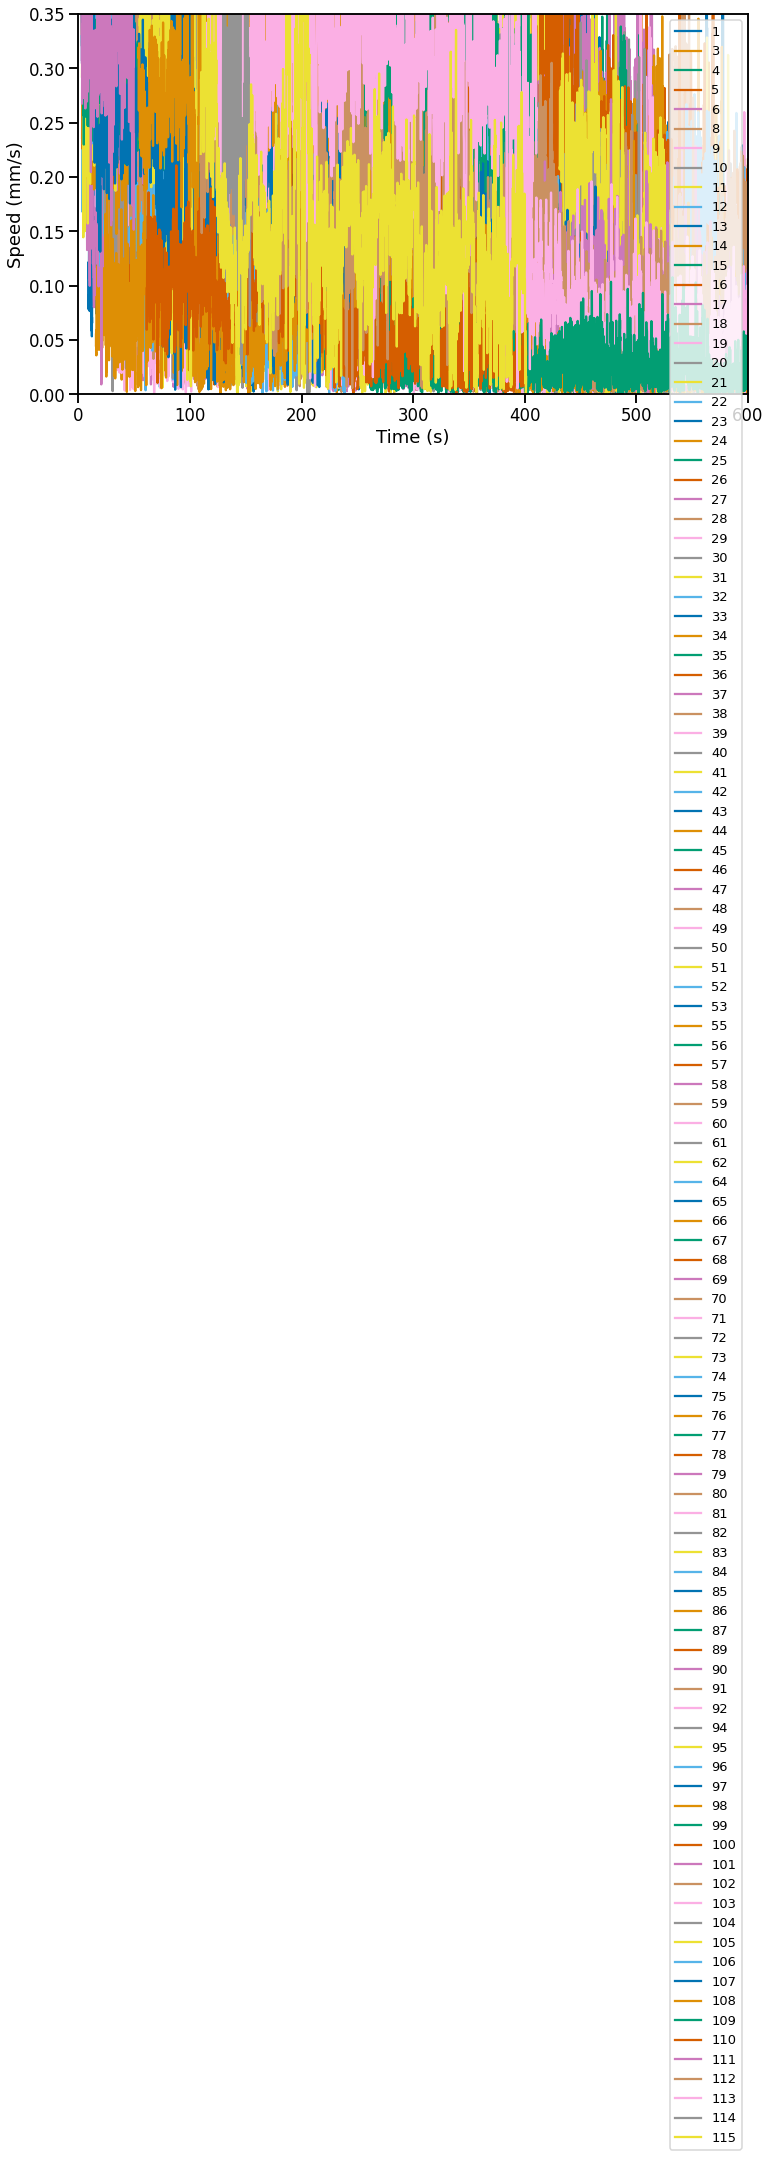

In [22]:
Name = "N2" #    <-----------------MUST INPUT HERE-----------------------------


filteredData = FinalData[FinalData.Strain == Name]

sns.set_context("talk")
sns.color_palette("colorblind")
plt.figure(linewidth = 2.5)#<- Make your figure lines THICCCC for clean display (posters)
plt.figure(figsize=(12,7))#<- set your figure size (width, length)
ax = sns.lineplot(x="time", #<- Here we use seaborn as our graphing package. 
             y="speed", 
             data = filteredData,
             hue = 'worm',
             palette = "colorblind"
                 )
plt.xlabel("Time (s)")#<- X-axis title
plt.ylabel("Speed (mm/s)")#<- Y-Axis title
plt.title("")#<- Figure Title
plt.ylim(top = 0.35) #<- setting the viewing range, from previous input in step 2
plt.ylim(bottom = 0)
plt.xlim(left= 0)
plt.xlim(right = 600)
ax.legend(loc = 'upper right', fontsize = '13') #<- location of your legend
# plt.savefig(f'Innate_Speed_Trace_SingleWorm_{Name}.png', format='png', dpi=450)
plt.show()


# Don't run this cell below

In [ ]:
Name = "N2" #    <-----------------MUST INPUT HERE-----------------------------


filteredData = FinalData[FinalData.Strain == Name]

sns.set_context("talk")
sns.color_palette("colorblind")
plt.figure(linewidth = 2.5)#<- Make your figure lines THICCCC for clean display (posters)
plt.figure(figsize=(12,7))#<- set your figure size (width, length)
ax = sns.scatterplot(x="time_synced", #<- Here we use seaborn as our graphing package. 
             y="speed", 
             data = filteredData,
             hue = 'Worm ID',
             palette = "colorblind", linewidth=0, alpha=0.8, s=15
                 )
plt.xlabel("Time (s)")#<- X-axis title
plt.ylabel("Speed (mm/s)")#<- Y-Axis title
plt.title("")#<- Figure Title
plt.ylim(top = 0.35) #<- setting the viewing range, from previous input in step 2
plt.ylim(bottom = 0)
plt.xlim(left= -50)
plt.xlim(right = 50)
ax.legend(loc = 'upper right', fontsize = '13') #<- location of your legend
# plt.savefig(f'Innate_Speed_Trace_SingleWorm_{Name}.png', format='png', dpi=450)
plt.show()



# Don't run this cell below either

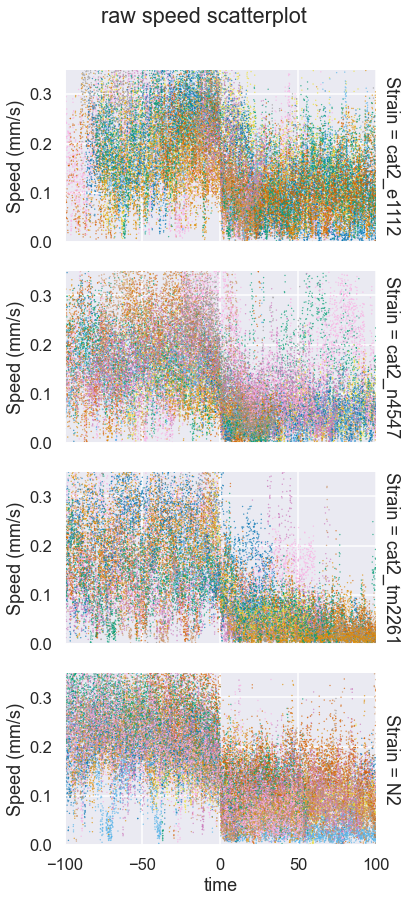

In [24]:
Title = "raw speed scatterplot" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
# plt.figure(linewidth = 2.5)
# plt.figure(figsize=(15, 10))
g = sns.FacetGrid(NewData, row = "Strain", margin_titles=True, height=3, aspect=2, xlim=[-100,100], ylim=[0,0.35]) #<--------------------------
g.map_dataframe(sns.scatterplot, "time_synced", "speed", hue="worm", palette = "colorblind", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("time", "Speed (mm/s)")
g.set_titles(col_template="{col_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title}", y=1.05)
g.tight_layout()
plt.savefig(f'{Title}.png', format='png', dpi=900, bbox_inches = 'tight')

## Graphing Population Speed Plots for Cross-Strain Comparisons

In [ ]:
# Name = "N2" #    <-----------------MUST INPUT HERE-----------------------------
# filteredData = Data[Data.Strain == Name]

sns.set_context("talk")
sns.color_palette("colorblind")
plt.figure(linewidth = 2.5)#<- Make your figure lines THICCCC for clean display (posters)
plt.figure(figsize=(12,7))#<- set your figure size (width, length)
ax = sns.lineplot(x="time_synced_bin", #<- Here we use seaborn as our graphing package. 
                 y="speed", 
                 data = Data,
                 hue = "Strain",
                 palette = ["black",#< ------------------Input Colours Here
                           "Grey"])
plt.xlabel("Time (s)")#<- X-axis title
plt.ylabel("Speed (mm/s)")#<- Y-Axis title
plt.title("")#<- Figure Title
plt.ylim(top = 0.35) #<- setting the viewing range, from previous input in step 2
plt.ylim(bottom = 0)
plt.xlim(left= -50)
plt.xlim(right = 50)
plt.legend(title='Strain', loc='upper left', labels=legendlabels)
ax.legend(loc = 'upper right', fontsize = '13', labels=["Wildtype"]) #<- location of your legend
plt.savefig('Innate_Speed_Trace_Wildtype.png', format='png', dpi=450)
plt.show()

In [ ]:
Title = "0 - 100 seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(DataData, row = "Strain", margin_titles=True, height=5, aspect=1) #<--------------------------
g.map_dataframe(sns.scatterplot, "x_0", "y_0", hue="time", palette = "YlOrBr", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title} expersion map", y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} expersion map.png', format='png', dpi=900, bbox_inches = 'tight')